# Import packages

In [1]:
import pandas as pd
import ml_help
from sklearn.model_selection import train_test_split
plot_label="Volume"

# Load data

In [2]:
df = pd.read_csv("./data/yonge_count_incidents.csv.zip")
df

,total_count,dist_from_mid_point,is_north_from_mid_point,hour,minute,magnitudeOfDelay,length,delay,month_1,month_2,...,day_of_week_3,day_of_week_5,event_description_Backed up traffic,event_description_Demonstration,event_description_No incidents,event_description_Obstruction on the road,event_description_Roadworks,event_description_Slow traffic,event_description_Stopped traffic,event_description_Two lanes closed
0,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1046.0,3.499076,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1034.0,3.499076,1.0,8.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1032.0,3.499076,1.0,8.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,934.0,3.499076,1.0,8.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,468.0,0.243920,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8391,478.0,0.243920,1.0,17.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8392,422.0,0.243920,1.0,17.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8393,436.0,0.243920,1.0,17.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Split data set into train and test

In [3]:
X = df.drop("total_count",axis=1)
y = df["total_count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## Sample 50% of remaining training data to run CV.
- The idea is have enough data that is representative of the dataset, while speeding up the CV performed by GridSearchCV.

In [4]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Show model metrics to determine what algorithms to run

In [5]:
metrics = pd.read_csv("./metrics/112_initial_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.953530,20.034035,731.235836,27.041373,0.064589,0.352622,0.003792
1,Random Forest,0.944241,21.576381,877.390060,29.620771,0.069072,0.898534,0.031277
2,Decision Tree,0.908011,27.396367,1447.499851,38.046023,0.086504,0.015129,0.000703
3,MLP,0.508397,68.654135,7735.613240,87.952335,0.226341,4.796759,0.001423
4,Lasso,0.370830,76.917355,9900.305978,99.500281,0.253358,0.008864,0.000650
5,Linear Regression,0.369789,77.413487,9916.675817,99.582508,0.253687,0.016756,0.000559
6,Elastic Net,0.339265,79.122850,10396.989901,101.965631,0.260806,0.004529,0.000478
7,Logistic Regression,0.213617,79.374628,12374.133413,111.239082,0.251797,8.988964,0.015439


# Run ML tasks

## Random Forest

Testing 243 param combinations for Random Forest. CV=5. Total fits: 1215

Searching space...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Searching space... OK! Took 80.1857922077179 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 0.999805212020874 seconds

model Random Forest
r2 0.9282615782896186
mae 25.569358508037464
mse 1128.839705857029
rmse 33.598209860899274
mape 0.0843808992649936
time_to_fit 0.999805212020874
time_to_predict 0.02763056755065918

Dumping model...
Dumping model... OK! Took 0.45925211906433105 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


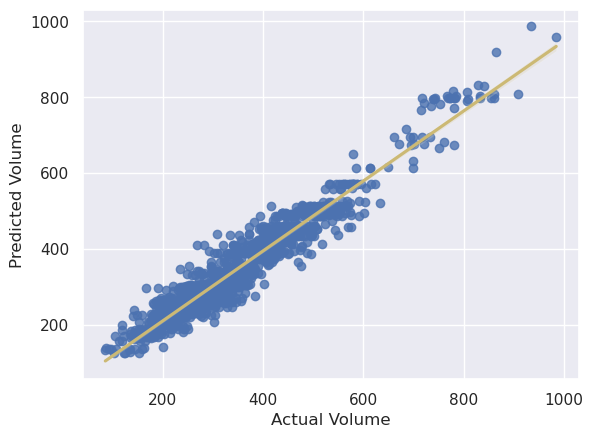

In [6]:
from sklearn.ensemble import RandomForestRegressor

file_name = "113_random_forest"
model_name = "Random Forest"

param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [16,32,48],
    "max_leaf_nodes": [10,50,100],
    "min_samples_leaf": [1,5,10],
    "min_samples_split": [2,8,16]
}

estimator = RandomForestRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## Decision Tree

Testing 750 param combinations for Decision Tree. CV=5. Total fits: 3750

Searching space...
Fitting 5 folds for each of 750 candidates, totalling 3750 fits
Searching space... OK! Took 2.172887086868286 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 0.007720232009887695 seconds

model Decision Tree
r2 0.9104160740634651
mae 27.567037504581542
mse 1409.6475806503822
rmse 37.54527374584426
mape 0.09022441549095277
time_to_fit 0.007720232009887695
time_to_predict 0.0003948211669921875

Dumping model...
Dumping model... OK! Took 0.004271745681762695 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


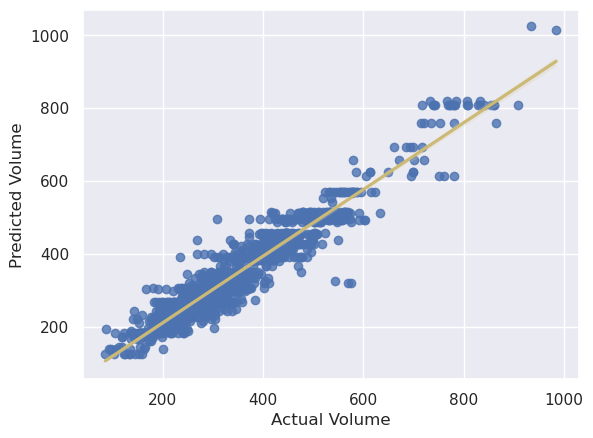

In [7]:
from sklearn.tree import DecisionTreeRegressor

file_name = "113_decision_tree"
model_name = "Decision Tree"

param_grid = {
    "random_state": [42],
    "criterion": ["squared_error"],
    "splitter": ["best"],
    "max_depth": [6,8,16,32,64,128],
    "min_samples_split": [2,4,8,16,32],
    "min_samples_leaf": [1,5,10,15,30],
    "max_leaf_nodes": [10,30,50,75,100]
}

estimator = DecisionTreeRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## XGBoost

Testing 243 param combinations for XGBoost. CV=5. Total fits: 1215

Searching space...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Searching space... OK! Took 5379.834499597549 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 0.953031063079834 seconds

model XGBoost
r2 0.9495719328615716
mae 20.78356240632067
mse 793.5106895060719
rmse 28.169321779305797
mape 0.06751326820955587
time_to_fit 0.953031063079834
time_to_predict 0.014338254928588867

Dumping model...
Dumping model... OK! Took 0.053766489028930664 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


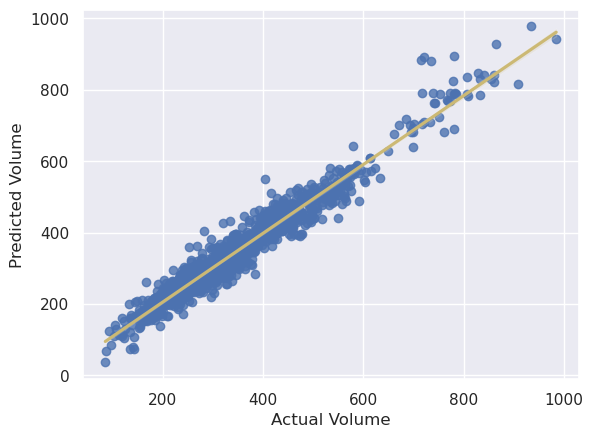

In [8]:
import xgboost as xgb

file_name = "113_xgboost"
model_name = "XGBoost"

param_grid = {
    "random_state": [42],
    "objective": ["reg:squarederror"],
    "tree_method": ["gpu_hist"],
    "predictor": ["gpu_predictor"],
    "num_parallel_tree": [10],
    "max_depth": [6, 8, 16],
    "n_estimators": [100, 250, 350],
    "max_leaves": [20, 40, 80],
    "alpha": [0.01, 0.1, 1],
    "learning_rate": [0.3, 0.5, 0.9]
}

estimator = xgb.XGBRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)
    
model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## MLP

Testing 216 param combinations for MLP. CV=5. Total fits: 1080

Searching space...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Searching space... OK! Took 258.67126655578613 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 3.7208783626556396 seconds

model MLP
r2 0.6968961755492592
mae 52.781396214134546
mse 4769.48926223172
rmse 69.06148899518254
mape 0.172667904837324
time_to_fit 3.7208783626556396
time_to_predict 0.0016162395477294922

Dumping model...
Dumping model... OK! Took 0.009251594543457031 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


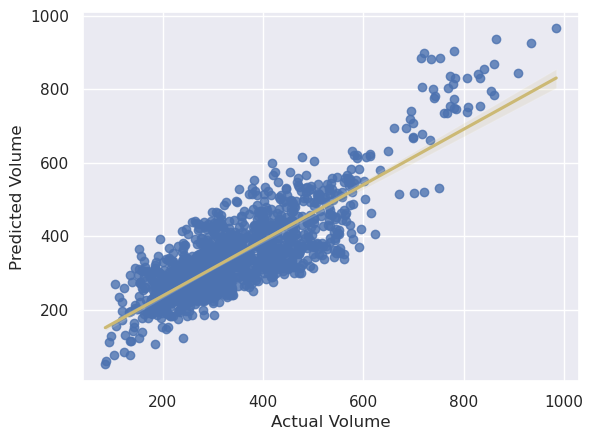

In [9]:
from sklearn.neural_network import MLPRegressor

file_name = "113_mlpr"
model_name = "MLP"

param_grid = {
    "random_state": [42],
    "hidden_layer_sizes": [(100), (100,50), (100,50,25)],
    "alpha": [0.0001, 0.001, 0.1],
    "learning_rate_init": [0.001, 0.1],
    "max_iter": [500,650,700],
    "tol": [1e-4],
    "epsilon": [1e-8, 1e-4],
    "n_iter_no_change": [3, 10]
}

estimator = MLPRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train